# KCS Slips exploration

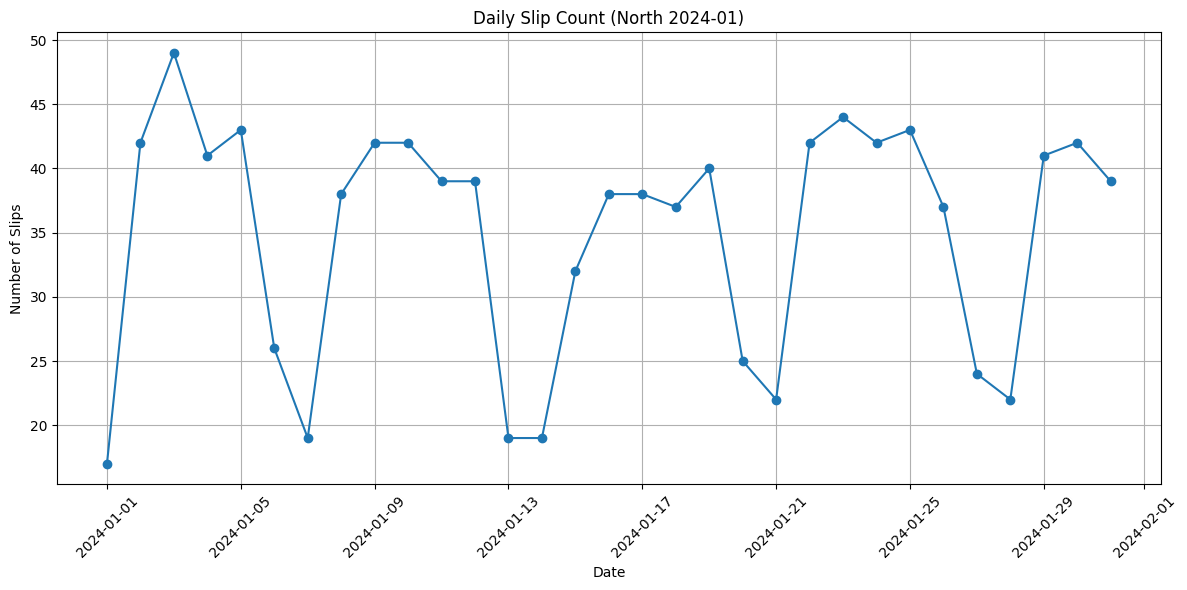

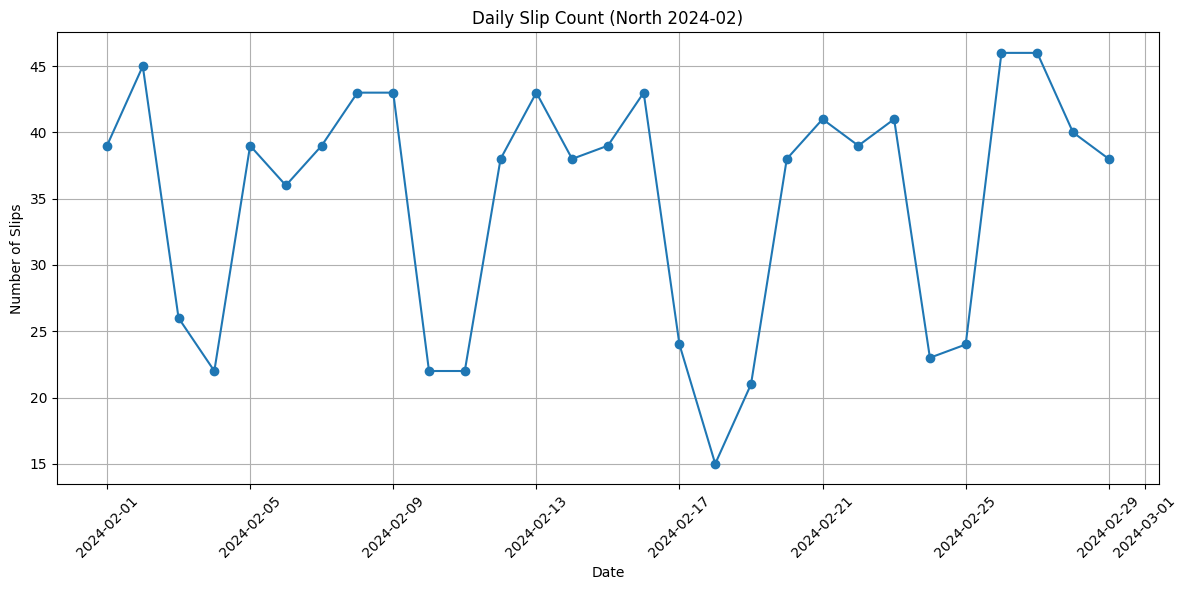

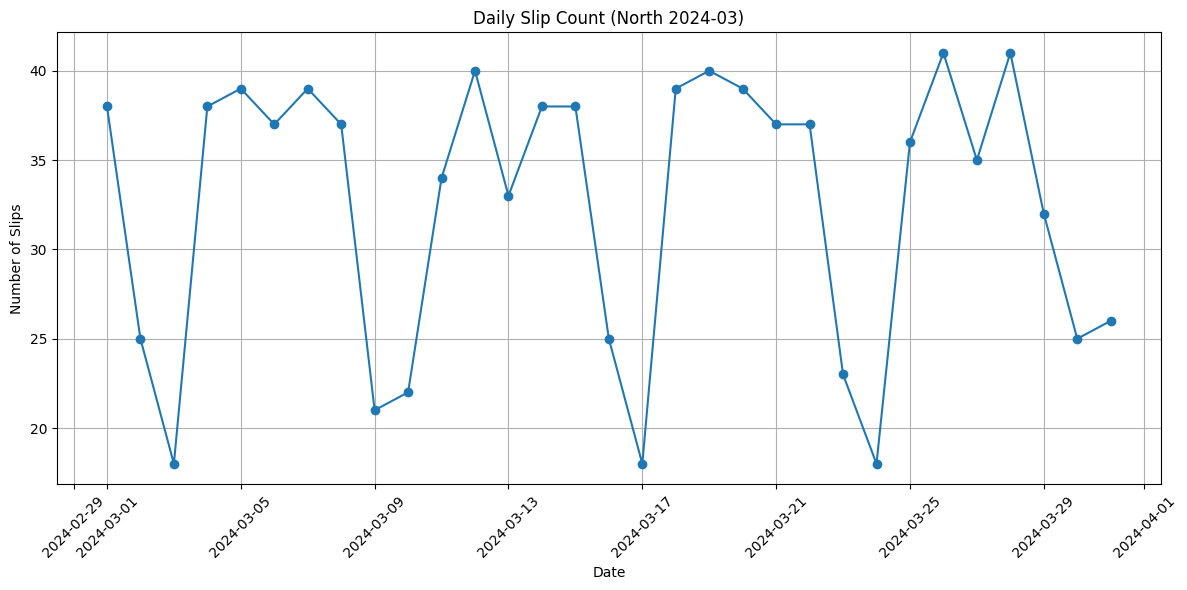

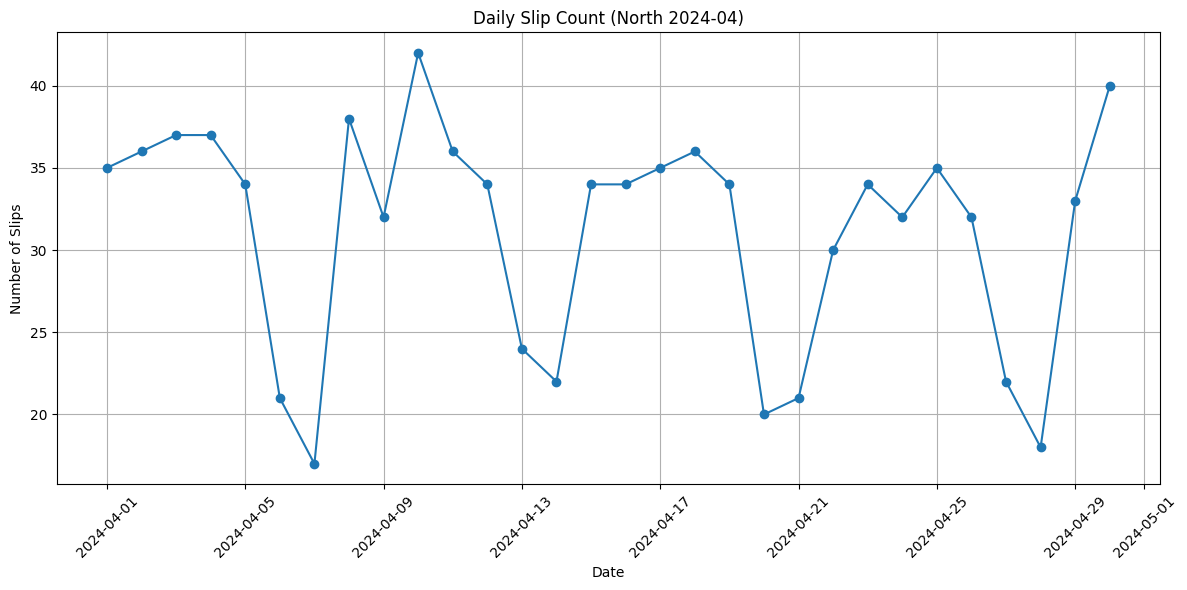

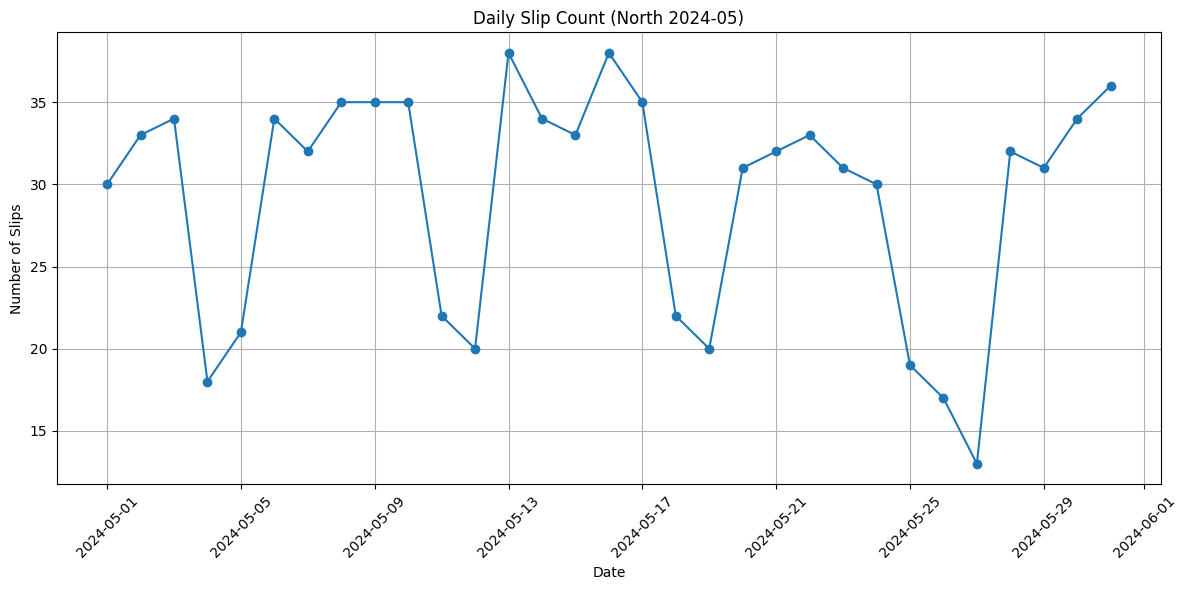

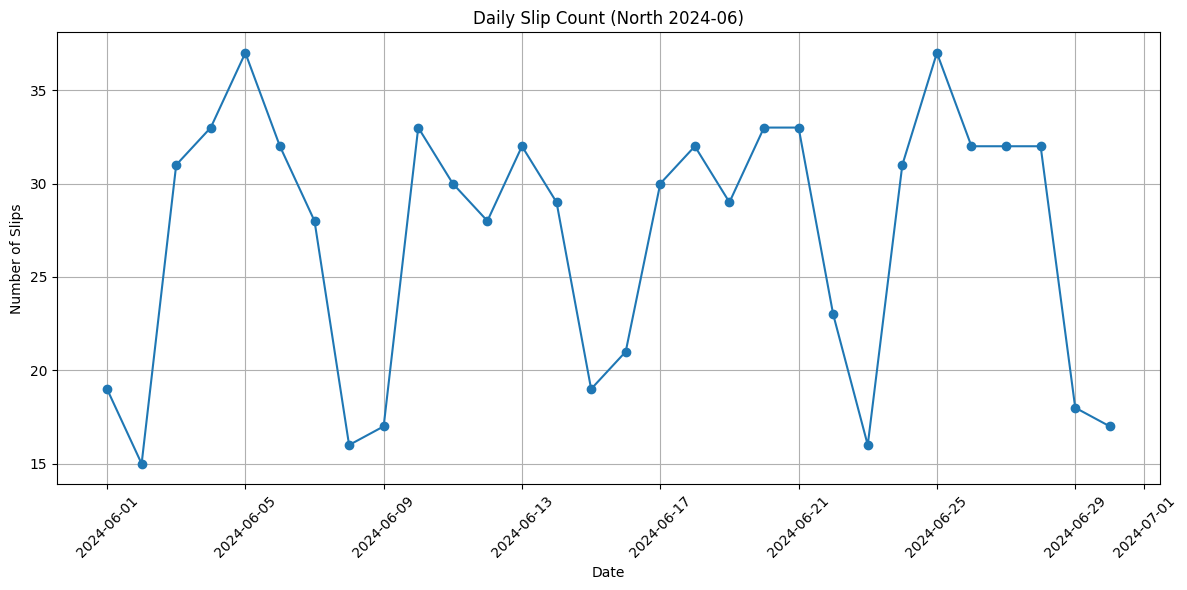

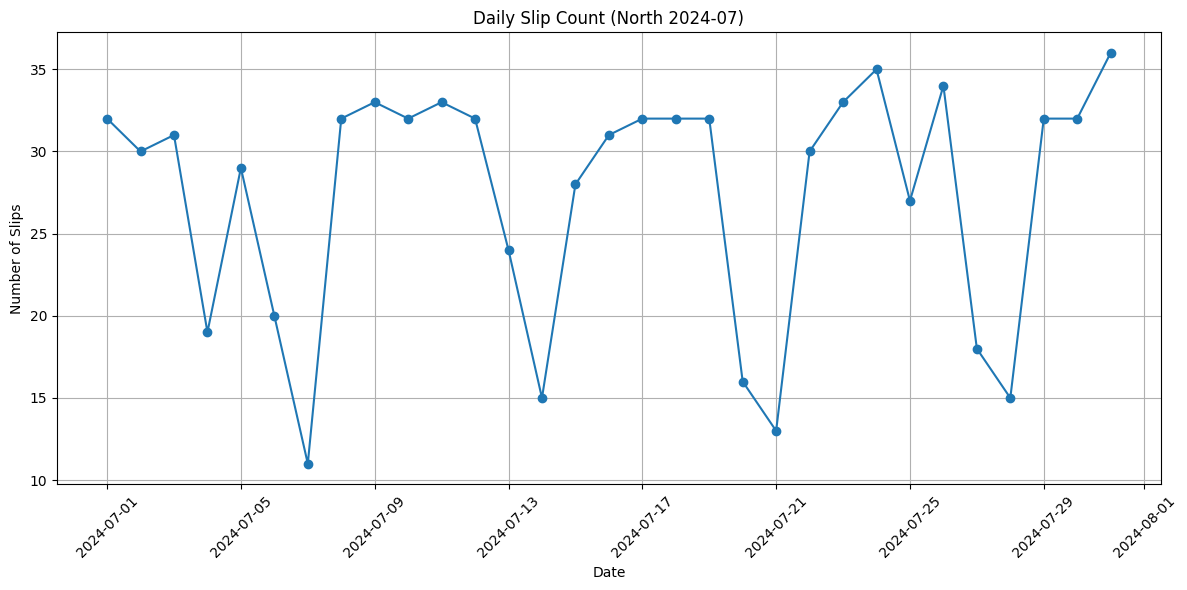

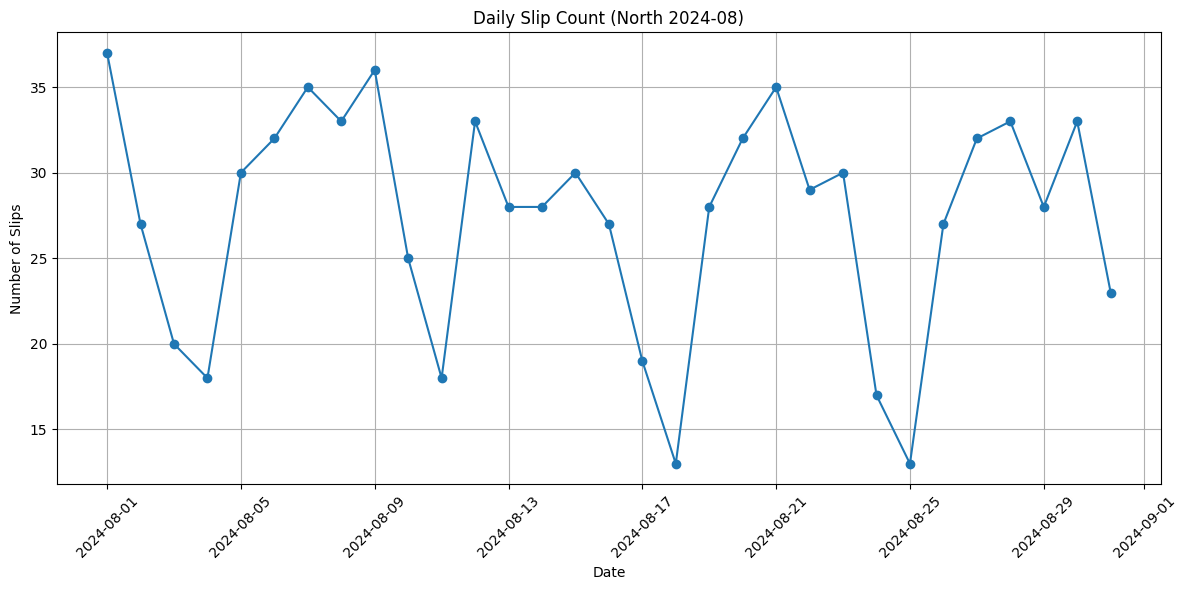

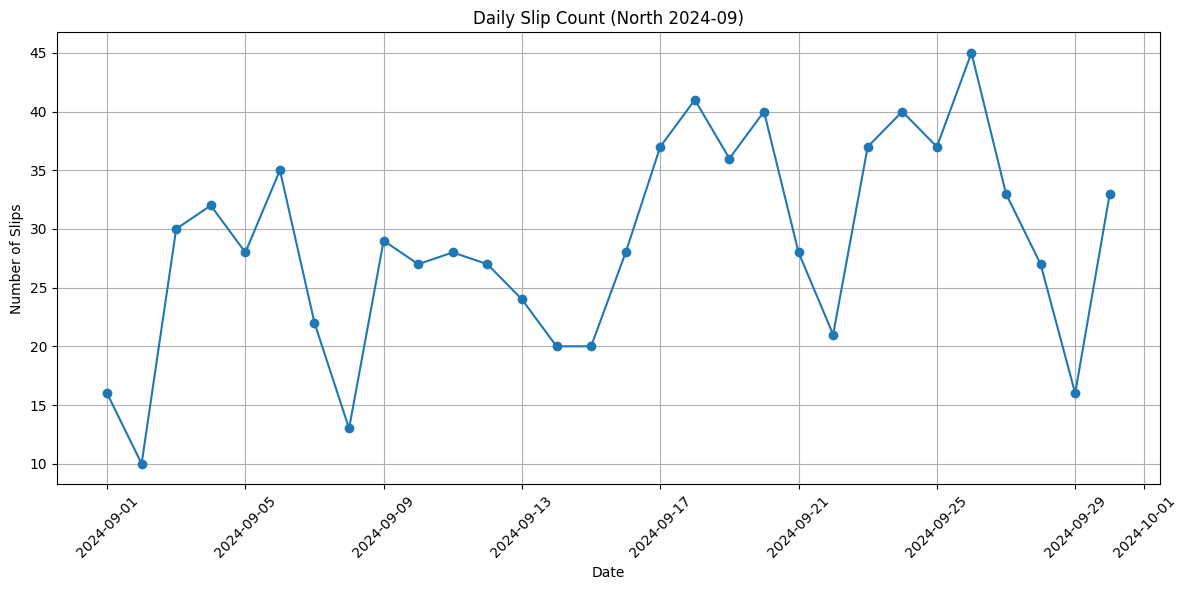

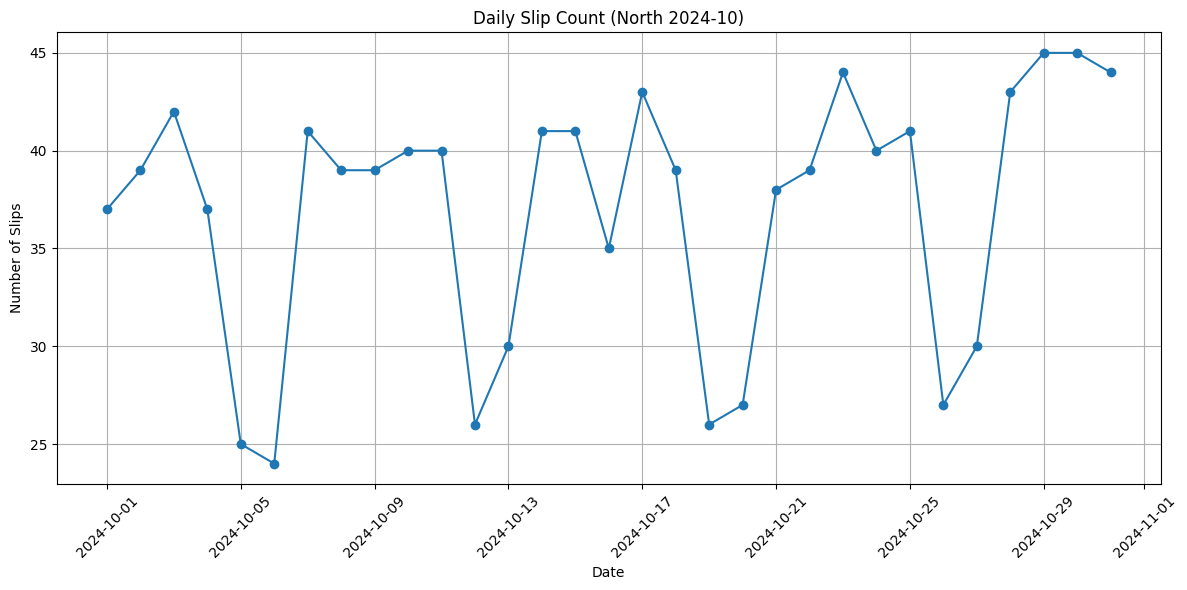

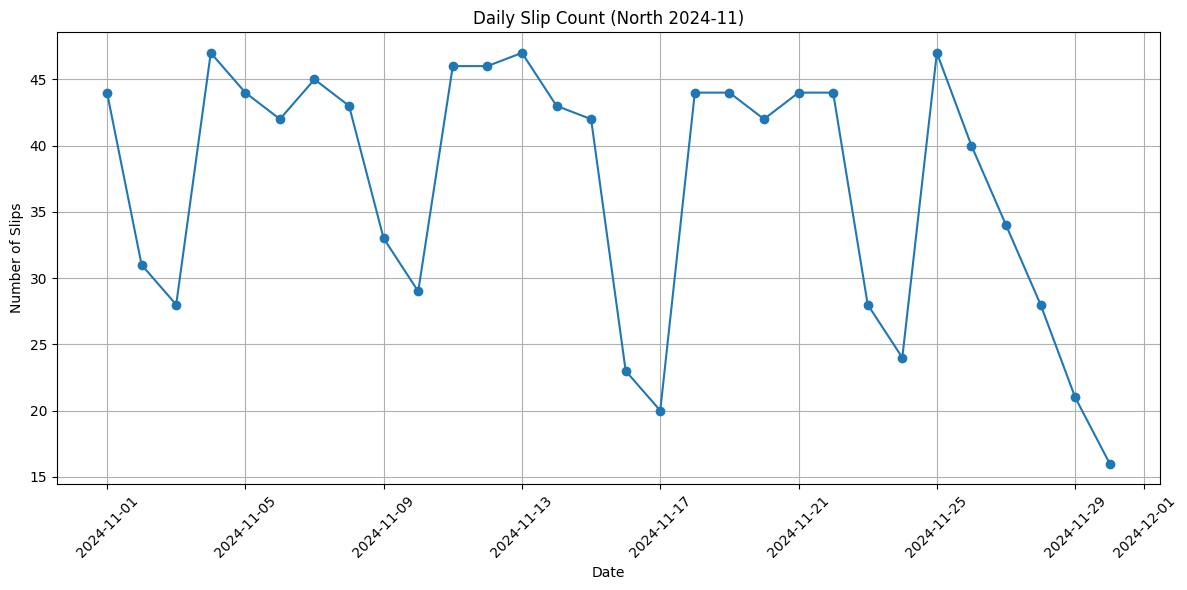

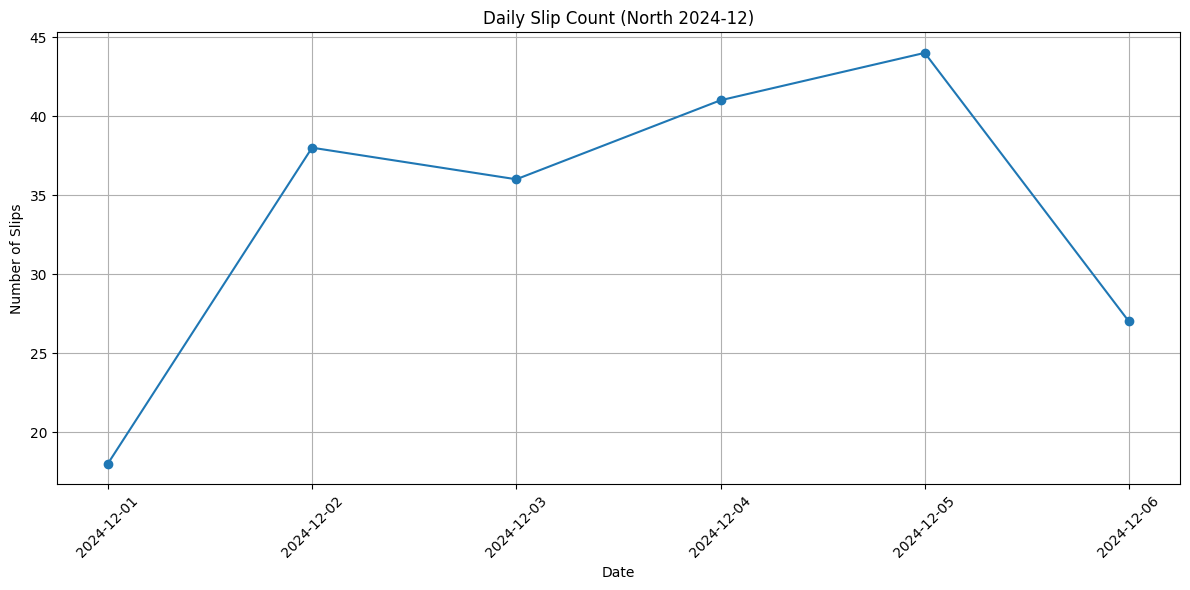

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

for i in range(1, 13):
    kcs_slips = pd.read_csv(f"../data/raw/kcs-slips/KCS_Slips_2024_{i:02d}.csv", usecols=["datetime", "eqNumber", "Line"])
    kcs_slips = kcs_slips.dropna()
    kcs_slips = kcs_slips.reset_index(drop=True)
    # ensure datetime column is in datetime format
    kcs_slips["datetime"] = pd.to_datetime(kcs_slips["datetime"], format="ISO8601")
    
    # filter north lines
    north_lines = ["Fitchburg", "Wachusett", "West Route", "East Route", "Gloucester", "NHML", "Wildcat"]
    kcs_slips_north = kcs_slips[kcs_slips["Line"].isin(north_lines)].copy()

    # add date column
    kcs_slips_north["date"] = kcs_slips_north["datetime"].dt.date
    
    # count daily slips
    daily_slips = kcs_slips_north.groupby('date')['eqNumber'].nunique().reset_index(name='daily_slip_count')
    
    # save to csv
    daily_slips.to_csv(f"../data/processed/kcs_slips_north_2024_{i:02d}.csv", index=False)
    
    plt.figure(figsize=(12, 6))
    plt.plot(daily_slips['date'], daily_slips['daily_slip_count'], marker='o', linestyle='-')
    plt.title(f"Daily Slip Count (North 2024-{i:02})")
    plt.xlabel("Date")
    plt.ylabel("Number of Slips")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()